In [3]:
import pandas as pd
import prophet as Prophet
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [4]:
cdc_psych = pd.read_csv('CSV/board-exam-results - CDC-Psych.csv')

In [7]:
cdc_psych['Year'] = cdc_psych['Time Date'].apply(lambda x: str(x)[-4:])
cdc_psych['Month'] = cdc_psych['Time Date'].apply(lambda x: str(x)[-6:-4])
cdc_psych['Day'] = cdc_psych['Time Date'].apply(lambda x: str(x)[:-6])
cdc_psych['ds'] = pd.DatetimeIndex(cdc_psych['Year']+'-'+cdc_psych['Month']+'-'+cdc_psych['Day'])

In [8]:
cdc_psych.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
cdc_psych.columns = ['y', 'ds']

In [10]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
cdc_psych_model = m.fit(cdc_psych)

20:50:17 - cmdstanpy - INFO - Chain [1] start processing
20:50:18 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 2, 22), datetime(2023, 11, 9), datetime(2024, 2, 22), datetime(2024, 11, 9), datetime(2025, 2, 22), datetime(2025, 11, 9), datetime(2026, 2, 22), datetime(2026, 11, 9), datetime(2027, 2, 22), datetime(2027, 11, 9), datetime(2028, 2, 22), datetime(2028, 11, 9), datetime(2029, 2, 22), datetime(2029, 11, 9), datetime(2030, 2, 22), datetime(2030, 11, 9)]

# Create a dataframe with those specific dates
cdc_psych_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
cdc_psych_forecast = m.predict(cdc_psych_future)
cdc_psych_forecast['yhat'] = cdc_psych_forecast['yhat'].clip(lower=0, upper=100).round()

In [12]:
cdc_psych_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-02-22,0.0
1,2023-11-09,0.0
2,2024-02-22,0.0
3,2024-11-09,0.0
4,2025-02-22,0.0
5,2025-11-09,0.0
6,2026-02-22,0.0
7,2026-11-09,0.0
8,2027-02-22,0.0
9,2027-11-09,0.0


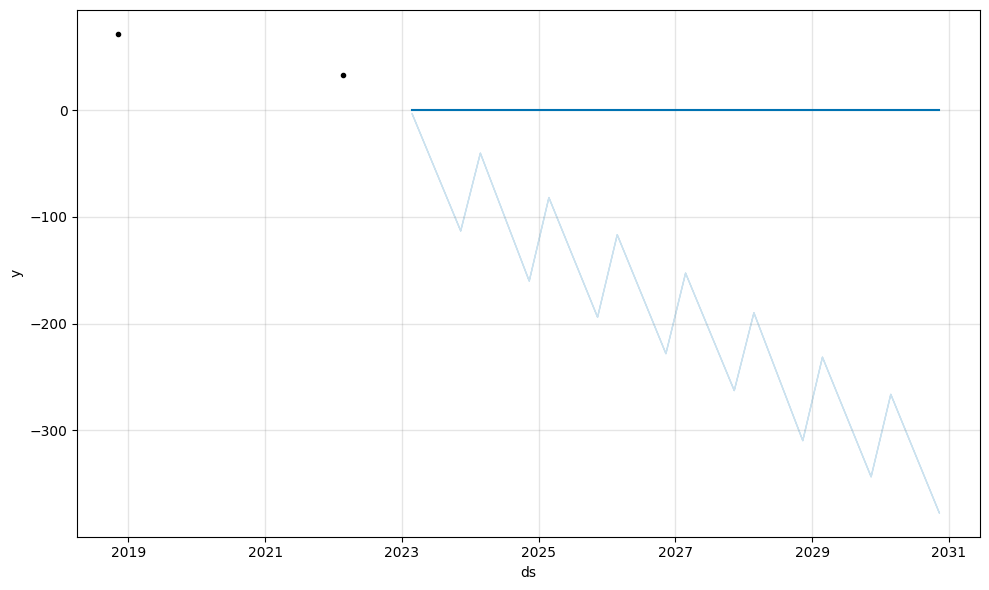

In [13]:
cdc_psych_plot = m.plot(cdc_psych_forecast)

In [21]:
lcba_psych = pd.read_csv('CSV/board-exam-results - LCBA - Psych.csv')

In [22]:
lcba_psych['Year'] = lcba_psych['Time Date'].apply(lambda x: str(x)[-4:])
lcba_psych['Month'] = lcba_psych['Time Date'].apply(lambda x: str(x)[-6:-4])
lcba_psych['Day'] = lcba_psych['Time Date'].apply(lambda x: str(x)[:-6])
lcba_psych['ds'] = pd.DatetimeIndex(lcba_psych['Year']+'-'+lcba_psych['Month']+'-'+lcba_psych['Day'])

In [23]:
lcba_psych.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
lcba_psych.columns = ['y', 'ds']

In [24]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
lcba_psych_model = m.fit(lcba_psych)

21:15:18 - cmdstanpy - INFO - Chain [1] start processing
21:15:22 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 10, 21), datetime(2023, 11, 9), datetime(2024, 10, 21), datetime(2024, 11, 9), datetime(2025, 10, 21), datetime(2025, 11, 9), datetime(2026, 10, 21), datetime(2026, 11, 9), datetime(2027, 10, 21), datetime(2027, 11, 9), datetime(2028, 10, 21), datetime(2028, 11, 9), datetime(2029, 10, 21), datetime(2029, 11, 9), datetime(2030, 10, 21), datetime(2030, 11, 9)]

# Create a dataframe with those specific dates
lcba_psych_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
lcba_psych_forecast = m.predict(lcba_psych_future)
lcba_psych_forecast['yhat'] = lcba_psych_forecast['yhat'].clip(lower=0, upper=100).round()

In [26]:
lcba_psych_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-10-21,52.0
1,2023-11-09,0.0
2,2024-10-21,0.0
3,2024-11-09,0.0
4,2025-10-21,36.0
5,2025-11-09,100.0
6,2026-10-21,100.0
7,2026-11-09,0.0
8,2027-10-21,0.0
9,2027-11-09,0.0


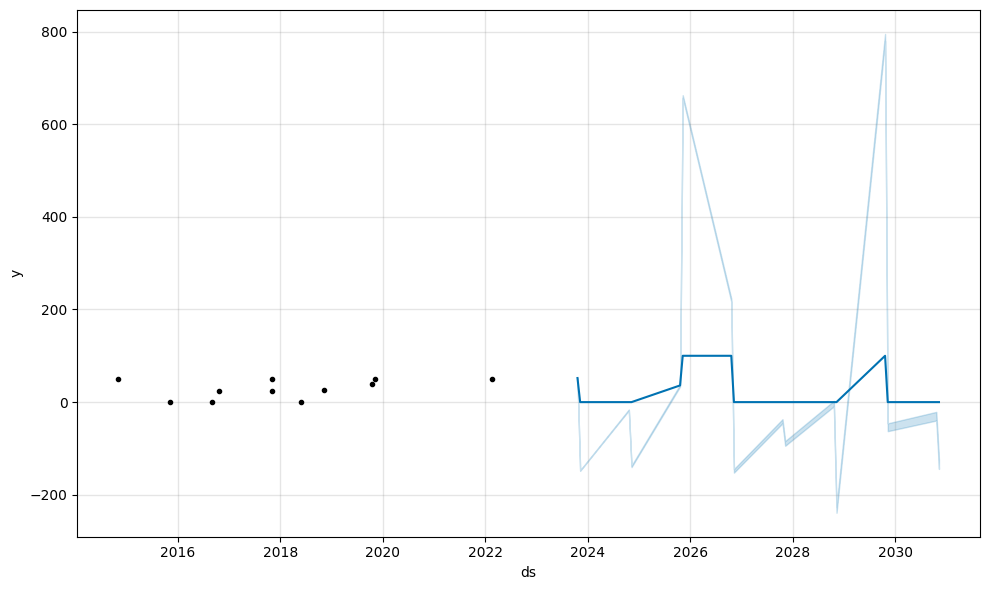

In [27]:
lcba_psych_plot = m.plot(lcba_psych_forecast)